<a href="https://colab.research.google.com/github/95871abhinandankumar/95871abhinandankumar/blob/main/ML_assignment5_batch_gradient_descent_skitlearn_updated_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import pandas as pd


boston = datasets.load_boston(return_X_y=False)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
print(boston_df)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88   11.9

[506 rows x 14 

In [2]:
train_dataset = boston_df.sample(frac=0.3)
dataframe = boston_df.drop(train_dataset.index)
validation_dataset = dataframe.sample(frac=(.1/.7))
test_dataset = dataframe.drop(validation_dataset.index)

print("train dataset\n", train_dataset)
# print("validation dataset\n", validation_dataset)
# print("test dataset\n", test_dataset)

train dataset
          CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
126   0.38735   0.0  25.65   0.0  0.581  ...  188.0     19.1  359.29  27.26   15.7
155   3.53501   0.0  19.58   1.0  0.871  ...  403.0     14.7   88.01  15.02   15.6
166   2.01019   0.0  19.58   0.0  0.605  ...  403.0     14.7  369.30   3.70   50.0
238   0.08244  30.0   4.93   0.0  0.428  ...  300.0     16.6  379.41   6.36   23.7
111   0.10084   0.0  10.01   0.0  0.547  ...  432.0     17.8  395.59  10.16   22.8
..        ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
266   0.78570  20.0   3.97   0.0  0.647  ...  264.0     13.0  384.07  14.79   30.7
342   0.02498   0.0   1.89   0.0  0.518  ...  422.0     15.9  389.96   8.65   16.5
381  15.87440   0.0  18.10   0.0  0.671  ...  666.0     20.2  396.90  21.08   10.9
361   3.83684   0.0  18.10   0.0  0.770  ...  666.0     20.2  350.65  14.19   19.9
501   0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9

In [3]:
from sklearn import preprocessing
import numpy as np


In [4]:
def hypothesis(w, index, dataset):
  sample =dataset[index][:-1]
  sample = np.concatenate([[1], sample])
  array = np.multiply(w, sample)
  return np.sum(array)

In [5]:
# to calculate the predicted value with the help of hypothesis function
def predicted_values(w, dataset):
  predicted = []
  for i in range(len(dataset)):
    predicted.append(hypothesis(w, i, dataset))
  
  return np.array(predicted)


# to calculate mean square error
def MSE(predicted, actual):
  return np.square(np.subtract(predicted, actual)).mean()/2

In [6]:
# to update w using batch gradient decendent
def update_parameter(w, alpha, dataset):
  predicted = predicted_values(w, dataset)
  m = len(dataset)
  w[0] = w[0] - (alpha /m)*(np.sum(np.subtract(predicted, dataset[:, -1])))
  for i in range(1, len(w)):
    w[i] = w[i] - (alpha /m)*(np.sum(np.multiply(np.subtract(predicted, dataset[:, -1]), dataset[:, i-1])))
  return w

In [7]:
def linear_regression(epoch, alpha, rho, w, train_dataset, validation):
  pre_MSE = 0
  curr_MSE = 0
  trains_MSE=[]
  validations_MSE=[]
  for itr in range(epoch):
    predicted = predicted_values(w, train_dataset)
    curr_MSE = MSE(predicted, train_dataset[:,-1])
    w = update_parameter(w, alpha, train_dataset)
    
    trains_MSE.append(curr_MSE)
    predicted = predicted_values(w, validation)
    validations_MSE.append(MSE(predicted, validation[:,-1]))

    if abs(curr_MSE - pre_MSE) <= rho:
      break;
    pre_MSE = curr_MSE
  return w, trains_MSE, validations_MSE

In [8]:

train = preprocessing.normalize(train_dataset.to_numpy())
validation = preprocessing.normalize(validation_dataset.to_numpy())
test = preprocessing.normalize(test_dataset.to_numpy())

print("train dataset after normalization...")
print(train, "\n\n\n\n")
print("validation dataset after normalization...")
print(validation, "\n\n\n\n")
print("test dataset after normalization...")
print(test)

train dataset after normalization...
[[9.24296982e-04 0.00000000e+00 6.12061897e-02 ... 8.57340035e-01
  6.50479817e-02 3.74634378e-02]
 [8.37581106e-03 0.00000000e+00 4.63926214e-02 ... 2.08529858e-01
  3.55882111e-02 3.69624563e-02]
 [3.60311860e-03 0.00000000e+00 3.50957184e-02 ... 6.61943249e-01
  6.63197947e-03 8.96213442e-02]
 ...
 [2.02739867e-02 0.00000000e+00 2.31164112e-02 ... 5.06900753e-01
  2.69223176e-02 1.39209327e-02]
 [5.05206412e-03 0.00000000e+00 2.38327271e-02 ... 4.61709710e-01
  1.86843313e-02 2.62028325e-02]
 [1.29419195e-04 0.00000000e+00 2.46522593e-02 ... 8.10011662e-01
  1.99821750e-02 4.62875615e-02]] 




validation dataset after normalization...
[[6.29214680e-04 0.00000000e+00 1.23715822e-02 0.00000000e+00
  1.00568991e-03 1.64941127e-02 1.56241111e-01 5.77553348e-03
  1.59633319e-02 6.12592861e-01 3.47202468e-02 7.68335118e-01
  8.26102425e-03 8.93946585e-02]
 [1.93441506e-03 0.00000000e+00 1.59304540e-02 0.00000000e+00
  1.05289733e-03 1.13763795e-02 1.9

In [10]:
w=[1 for _ in range(14)]
w, trains_MSE, validations_MSE= linear_regression(500, 0.1, 0.001, w, train, validation)


print(trains_MSE)
print(validations_MSE)
predicted = predicted_values(w, test)
test_MSE = MSE(predicted, test[:,-1])
print(test_MSE)



[3.278129536807548, 2.1358597470048917, 1.391759097393567, 0.9070348946592958, 0.5912744172658813, 0.3855807591833111, 0.2515871343985183, 0.16430054466629931, 0.10743998169146414, 0.07039962585437233, 0.04627060469533575, 0.030552321335434736, 0.02031298445938197, 0.013642758426804841, 0.009297532799820672, 0.006466865699884342, 0.004622816825175358, 0.003421473835182614, 0.002638804394812387]
[2.1971792203383322, 1.4398802859801025, 0.9450174599723165, 0.6214085969329163, 0.4095982887459799, 0.27080969026917, 0.17974535783208087, 0.11989583280109274, 0.08048215873514471, 0.05446304755879348, 0.037235798252767155, 0.02578931601222255, 0.018151780625298257, 0.013030369622140537, 0.009576181940451641, 0.007230794051783176, 0.005626053059577978, 0.004518597785669666, 0.003747041376898499]
0.0022701311653732636


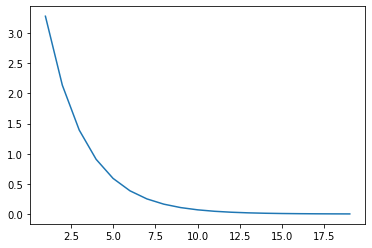

In [11]:
import matplotlib.pyplot as plt

# print(trains_MSE1)
epoch = [i+1 for i in range(len(trains_MSE))]
plt.plot(epoch, trains_MSE)

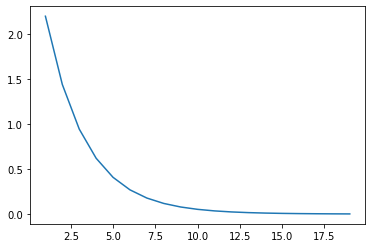

In [12]:
plt.plot(epoch, validations_MSE)

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(np.delete(train, -1, 1),  train[:,-1])


from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(train[:,-1], reg.predict(np.delete(train, -1, 1)), sample_weight=None)
mse_validation = mean_squared_error(validation[:,-1], reg.predict(np.delete(validation, -1, 1)), sample_weight=None)
mse_test = mean_squared_error(test[:,-1], reg.predict(np.delete(test, -1, 1)), sample_weight=None)
print("train_mse", mse_train)
print("validation mse", mse_validation)
print("test_mse", mse_test)

train_mse 5.841550026942976e-05
validation mse 4.826684267206832e-05
test_mse 7.457862444493374e-05


In [19]:
train_UN = train_dataset.to_numpy()
validation_UN = validation_dataset.to_numpy()
test_UN = test_dataset.to_numpy()

w=[1 for _ in range(14)]
w, trains_MSE, validations_MSE= linear_regression(1000, 0.000001, 0.001, w, train_UN, validation_UN)


print(trains_MSE)
print(validations_MSE)
predicted = predicted_values(w, test)
test_MSE = MSE(predicted, test[:,-1])
print(test_MSE)
print(trains_MSE)
print(validations_MSE)
predicted = predicted_values(w, test_UN)
test_MSE = MSE(predicted, test_UN[:,-1])
print(test_MSE)

[426079.1595574408, 193913.91074105687, 88375.58241312436, 40398.90155305248, 18588.437165745687, 8672.571303711598, 4163.763681075098, 2112.930427892905, 1179.4857943218078, 754.0290744094763, 559.5389736203855, 470.086062767805, 428.4237731018073, 408.52722119191156, 398.5642468055699, 393.15444832323493, 389.8503207817594, 387.5376613789929, 385.70842841677836, 384.1301969544969, 382.69589803208936, 381.35551065419367, 380.08500768553455, 378.87223661885446, 377.7104986583937, 376.595627394414, 375.5246584231676, 374.49522228228085, 373.50526629264573, 372.55292601317865, 371.63646480130734, 370.75424442365835, 369.90470986826, 369.08638069531463, 368.2978454393867, 367.537757474241, 366.80483161469124, 366.0978411223286, 365.4156149605761, 364.75703522583143, 364.1210347185589, 363.50659463518934, 362.91274236953035, 362.3385494160774, 361.7831293694033, 361.2456360147218, 360.7252615052439, 360.22123462227614, 359.73281911426074, 359.25931211115056, 358.80004261069644, 358.3543700

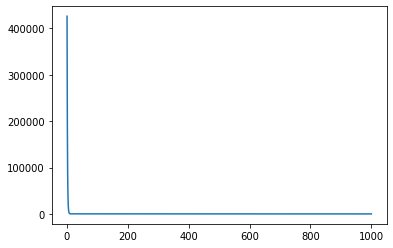

In [20]:
epoch = [i+1 for i in range(len(trains_MSE))]
plt.plot(epoch, trains_MSE)

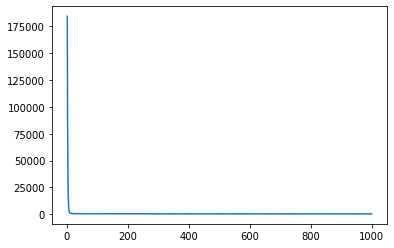

In [21]:
plt.plot(epoch, validations_MSE)

In [22]:
# when dataset is not normalized

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(np.delete(train_UN, -1, 1),  train_UN[:,-1])


from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(train_UN[:,-1], reg.predict(np.delete(train_UN, -1, 1)), sample_weight=None)
mse_validation = mean_squared_error(validation_UN[:,-1], reg.predict(np.delete(validation_UN, -1, 1)), sample_weight=None)
mse_test = mean_squared_error(test_UN[:,-1], reg.predict(np.delete(test_UN, -1, 1)), sample_weight=None)
print("train_mse", mse_train)
print("validation mse", mse_validation)
print("test_mse", mse_test)

train_mse 19.37145802445955
validation mse 16.21399368073882
test_mse 28.056899408482142
